In [19]:
import pandas as pd

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [21]:
df=pd.read_csv('F:/imarticus/imarticus machine learning---lms/decision tree lms/Heart Disease Prediction/Dataset/heartdisease.csv')

In [22]:
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [23]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [25]:
df.shape

(303, 14)

In [26]:
df.describe(exclude='object')

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [27]:
len(df)

303

In [28]:
x=df.drop(['gender'],axis=1)

In [29]:
y=df.gender

In [30]:
x.shape

(303, 13)

In [31]:
y.shape

(303,)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [34]:
from sklearn.tree import DecisionTreeClassifier as dt
clf=dt()

In [35]:
clf

DecisionTreeClassifier()

In [36]:
scores=cross_val_score(clf,x_train,y_train,cv=5,scoring='f1_macro')

In [37]:
scores.mean()

0.6438405042603629

In [38]:
clf.fit(x_train,y_train)
train_predictions=clf.predict(x_train)
test_predictions=clf.predict(x_test)

In [39]:
clf

DecisionTreeClassifier()

In [40]:
from sklearn.metrics import f1_score,make_scorer

In [41]:
print('training f1 score is',f1_score(train_predictions,y_train))
print('testing f1 score is',f1_score(test_predictions,y_test))

training f1 score is 1.0
testing f1 score is 0.7819548872180451


# train_test split

# Accuracy..Precision...Recall at Random_state=0

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
from sklearn import metrics
print('Accuracy',metrics.accuracy_score(y_test,y_pred))
print('Precision',metrics.precision_score(y_test,y_pred))
print('Recall',metrics.recall_score(y_test,y_pred))

Accuracy 0.7142857142857143
Precision 0.8666666666666667
Recall 0.7428571428571429


# Accuracy..Precision...Recall at Random_state=100

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
from sklearn import metrics
print('Accuracy',metrics.accuracy_score(y_test,y_pred))
print('Precision',metrics.precision_score(y_test,y_pred))
print('Recall',metrics.recall_score(y_test,y_pred))

Accuracy 0.7472527472527473
Precision 0.8253968253968254
Recall 0.8125


# Accuracy..Precision...Recall at Random_state=350

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=350)
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
from sklearn import metrics
print('Accuracy',metrics.accuracy_score(y_test,y_pred))
print('Precision',metrics.precision_score(y_test,y_pred))
print('Recall',metrics.recall_score(y_test,y_pred))

Accuracy 0.8021978021978022
Precision 0.8472222222222222
Recall 0.8970588235294118


# Observation=Hence We Can See That At Random_State=350,We Get Better....Accuracy=0.78 , Precision=0.83 , Recall=0.88 comparing to random_state=0 and random_state=100

# checking accuracy with KFold

In [45]:
from sklearn.model_selection import KFold
from sklearn import tree
lt=tree.DecisionTreeClassifier() 
kfold_validation=KFold(5)# it will do 10 different split
import numpy as np
from sklearn.model_selection import cross_val_score
result1=cross_val_score(lt,x,y,cv=kfold_validation)
print(result1)
print(np.mean(result1))

[0.59016393 0.72131148 0.62295082 0.75       0.78333333]
0.693551912568306


In [46]:
from sklearn.model_selection import KFold
from sklearn import tree
lq=tree.DecisionTreeClassifier() 
kfold_validation=KFold(5)# it will do 10 different split
import numpy as np
from sklearn.model_selection import cross_val_score
result2=cross_val_score(lq,x,y,cv=kfold_validation)
print(result2)
print(np.mean(result2))

[0.59016393 0.80327869 0.63934426 0.8        0.8       ]
0.7265573770491803


In [47]:
from sklearn.model_selection import KFold
from sklearn import tree
lo=tree.DecisionTreeClassifier() 
kfold_validation=KFold(9)# it will do 10 different split
import numpy as np
from sklearn.model_selection import cross_val_score
result3=cross_val_score(lo,x,y,cv=kfold_validation)
print(result3)
print(np.mean(result3))

[0.64705882 0.58823529 0.82352941 0.61764706 0.76470588 0.67647059
 0.6969697  0.66666667 0.78787879]
0.6965735789265202


####  Observation=Hence We Can See That At KFold=9,We Get Better....Accuracy=0.85 At 3rd Iteration

# shufflesplit cross validation

In [48]:
from sklearn.model_selection import ShuffleSplit
ld=tree.DecisionTreeClassifier() 
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)a
results=cross_val_score(ld,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.76923077 0.72527473 0.76923077 0.61538462 0.67032967 0.67032967
 0.81318681 0.69230769 0.7032967  0.7032967 ]
0.7131868131868131


In [49]:
from sklearn.model_selection import ShuffleSplit
lb=tree.DecisionTreeClassifier() 
ssplit=ShuffleSplit(n_splits=5,test_size=0.30)
results=cross_val_score(lb,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.54945055 0.7032967  0.69230769 0.7032967  0.71428571]
0.6725274725274726


# decision tree

In [50]:
import graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

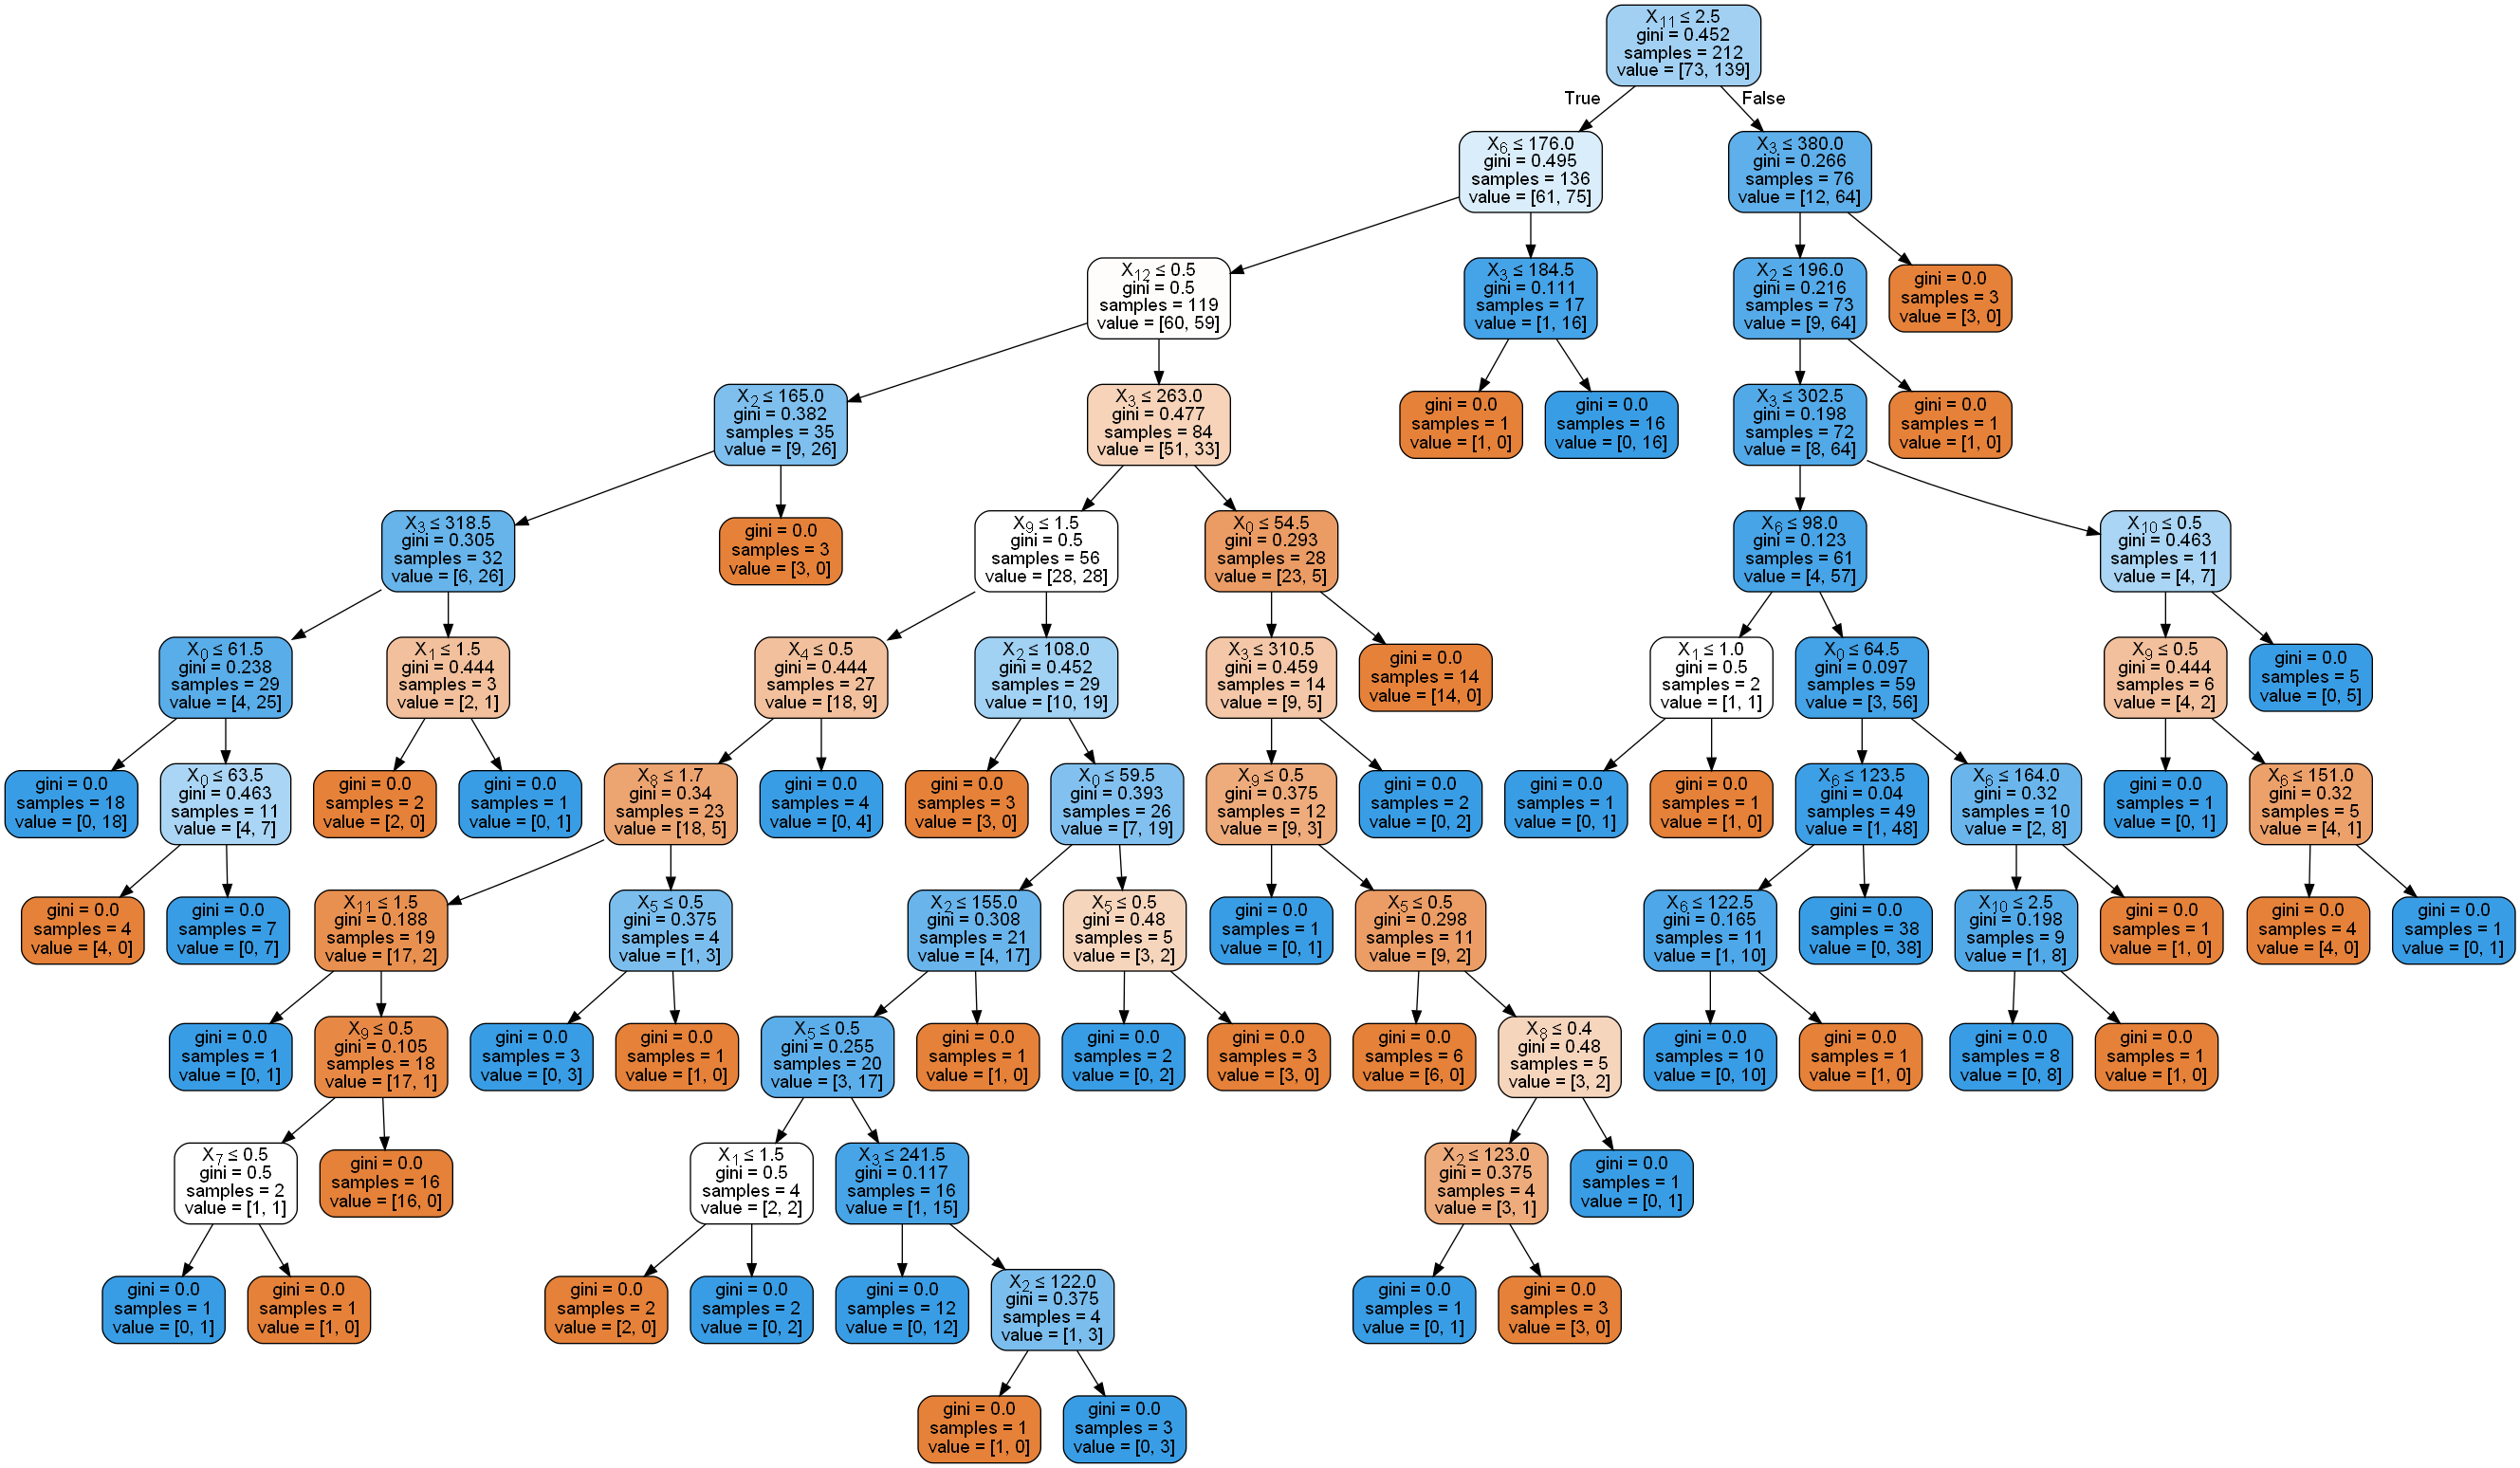

In [51]:
dot_data = StringIO()
export_graphviz(dt, out_file = dot_data,
                filled = True, rounded = True,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets ,ensemble 
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [53]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [54]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print('The mean squared error (MSE) on test set: {:.4f}'.format(mse))

The mean squared error (MSE) on test set: 0.1456


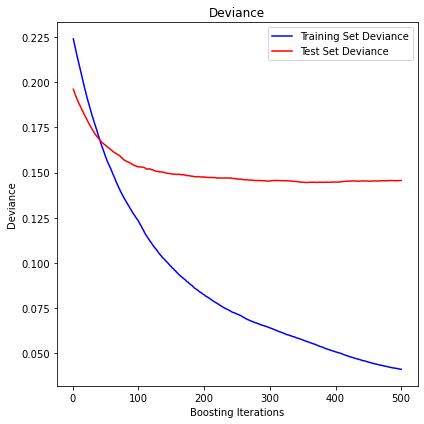

In [55]:
test_score = np.zeros((params['n_estimators'],),dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(x_test)):
    test_score[i] = reg.loss_(y_test, y_pred)
    
fig = plt.figure(figsize=(6,6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label = 'Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label = 'Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

# random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(x_train,y_train)

y_pred1=rf.predict(x_test)

print(y_pred1.shape)
print(y_pred1[0:5])

from sklearn import metrics

print('Accuracy using RF',metrics.accuracy_score(y_test,y_pred1))

print('Precision using RF',metrics.precision_score(y_test,y_pred1))

print('Recall using RF',metrics.recall_score(y_test,y_pred1))

(91,)
[1 1 1 0 0]
Accuracy using RF 0.7692307692307693
Precision using RF 0.821917808219178
Recall using RF 0.8823529411764706


# RandomizedSearchCV

In [57]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [58]:
# create function to generate model report
def report(results, n_top=3):
    for i in range(1, n_top+1):
        candidates = np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0: .3f} (std: {1: .3f})'.format(results['mean_test_score'][candidate],
                                                                           results['std_test_score'][candidate]))
            print('Parameters: {0}'.format(results['params'][candidate]))
            print("")

In [59]:
param_dist={'max_depth':[3,None],
           'max_features':sp_randint(1,11),
           'min_samples_split':sp_randint(2,11),
           'bootstrap':[True,False],
           'criterion':['gini','entropy']}

In [60]:
n_iter_search=20
random_search=RandomizedSearchCV(rf,param_distributions=param_dist,n_iter=n_iter_search,cv=5)

In [61]:
start=time()
random_search.fit(x_train,y_train)
print('Randomized search too %.2f seconds for %d candidates' 'parameter setting.'%((time()-start),n_iter_search))
report(random_search.cv_results_)

Randomized search too 39.04 seconds for 20 candidatesparameter setting.
Model with rank: 1
Mean validation score:  0.750 (std:  0.039)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_split': 10}

Model with rank: 2
Mean validation score:  0.746 (std:  0.057)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_split': 10}

Model with rank: 3
Mean validation score:  0.741 (std:  0.068)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_split': 3}



In [62]:
random_search.cv_results_

{'mean_fit_time': array([0.3330647 , 0.45247393, 0.43940392, 0.4021637 , 0.36875162,
        0.34063325, 0.36249046, 0.26563945, 0.3218606 , 0.25312505,
        0.32812309, 0.3093739 , 0.45587535, 0.30376325, 0.46061254,
        0.33124704, 0.2687499 , 0.25312624, 0.3562448 , 0.46136861]),
 'std_fit_time': array([5.69955411e-02, 1.27209384e-01, 1.05872414e-01, 1.37470511e-01,
        7.66631361e-03, 6.27023620e-03, 1.53329720e-02, 2.73480141e-05,
        7.64816065e-03, 6.24259015e-03, 9.00073556e-06, 2.68816420e-02,
        1.45885742e-01, 7.21958716e-03, 1.02861973e-01, 6.25005170e-03,
        6.24790891e-03, 6.25927824e-03, 6.25445155e-03, 1.24949824e-01]),
 'mean_score_time': array([0.03224049, 0.03346963, 0.03179722, 0.04450936, 0.02499986,
        0.02811813, 0.02500916, 0.03123693, 0.02500877, 0.02187939,
        0.02500272, 0.02500286, 0.04317756, 0.02812572, 0.02531886,
        0.03125377, 0.02187719, 0.03125272, 0.02500553, 0.03307643]),
 'std_score_time': array([2.40060152e-

# gridsearchCV

In [63]:
# Use a full grid of mentioned parameters
param_grid = {'max_depth': [3,None],
              'max_features': [1,3,10],
              'min_samples_split': [2,3,10],
              'bootstrap' :[True,False],
              'criterion': ['gini','entropy']}

In [64]:
# Run grid search
grid_search = GridSearchCV(rf, param_grid = param_grid,cv = 5)

In [65]:
start = time()
grid_search.fit(x_train,y_train)
print('GridSearchCV took %.2f seconds for %d candidates parameter settings.' 
      %((time()-start), len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 144.55 seconds for 72 candidates parameter settings.
Model with rank: 1
Mean validation score:  0.760 (std:  0.069)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 3}

Model with rank: 2
Mean validation score:  0.755 (std:  0.047)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 3}

Model with rank: 3
Mean validation score:  0.750 (std:  0.059)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_split': 2}



# now lets run the best parameter settings from the grid to build random forest model

In [ ]:
# now lets run the best parameter settings from the grid to build random forest model
rf_grid_search = RandomForestClassifier(n_estimators=50, bootstrap=False, criterion='gini', max_features=10,
                                        min_samples_split=7)

In [67]:
# fit the model
rf_grid_search.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_features=10, min_samples_split=7,
                       n_estimators=50)

In [68]:
ypred = rf_grid_search.predict(x_test)

In [69]:
print('Accuracy using Grid Search RF', metrics.accuracy_score(y_test,ypred))
print('Precision using Grid Search RF', metrics.precision_score(y_test,ypred))
print("Recall using Grid Search RF", metrics.recall_score(y_test,ypred))

Accuracy using Grid Search RF 0.7912087912087912
Precision using Grid Search RF 0.8450704225352113
Recall using Grid Search RF 0.8823529411764706


# now lets run the best parameter to bulid decision tree model

In [82]:
dt_grid_search = tree.DecisionTreeClassifier(criterion='gini', max_features='auto',min_samples_split=7,min_samples_leaf = 5,
                                             max_depth = 3)

In [83]:
dt_grid_search=dt_grid_search.fit(x_train,y_train)

In [84]:
# Predicting the quality 
y_pred_3 = dt_grid_search.predict(x_test) 

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_3)

0.7912087912087912